## Session 9(due by noon 30.04.23): Neural Networks and Deep Learning 
## Note: Please complete the tasks in this file, and rename the file as "Exercise_09_FirstName_LastName.ipynb"
## Total points: 10 + 1 bonus

In a previous exercise, you built your own simple neural network (perceptron) and implemented the gradient descent optimizer. Hopefully that helped you build some intuition of how a neural network learns. The perceptron is a very simple model, and thus quite limited in its application. More complicated tasks require more sophisticated optimizers, cost functions as well as network architectures.

This week, we will use the python deep learning library [PyTorch](https://pytorch.org/) and learn how to build a basic neural network with it. The exercise is aimed at introducing you to basics of the framework and to show how convenient it is to build such deep learning models.

In the first part of this notebook, you'll find a fully worked through example of the classic machine learning problem of handwritten digit classification. This should prepare you for the first exercise, where you will tackle a very similar problem &mdash; the classification of articles of clothing.

In the second exercise, we move to another common type of problem: a regression problem. You will use the Boston Housing Price dataset and try to predict the median price of homes in a given Boston suburb.

These introductory problems are intentionally kept brief and rather simple. The main goal of this week is for you to get a taste of how to tackle common machine learning problems and develop a good workflow that can easily be adapted for other, more elaborate problems.

After this exercise, you will be able to
* solve simple image classification tasks with PyTorch

*Keywords*: neural networks: deep learning, PyTorch, activation function, optimzer, loss function &mdash; image classification: handwritten digits

In [1]:
# Run this cell only once. You can use your preferred package manager to download the pyTorch.  
# Refer to the official documentation.
#! pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

In [2]:
import torch
from torchvision import datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader as DataLoader
from torchvision import transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision

### A first look at a neural network

Let's look at a fully-worked through example of a neural network built in *PyTorch*. The problem we will solve is a machine learning classic: classification of handwritten digits with the MNIST dataset.

First, let's define the problem: We are trying to solve the classification of grayscale images of handwritten digits (28 x 28 pixels) into 10 categories (one through nine). In a grayscale image, each point in the two dimensional space has two values (a, b) assigned to it, where a and b range of 0 to 255. Or to put it simply, the pixel values fall in the range of 0 to 255. We begin by loading the dataset.

#### Preprocessing
The library works with tensors. Tensors are merely a generalisation of scalars and vectors; a scalar is a zero rank tensor, and a vector is a first rank tensor. So, in the first step, we convert the input images into tensors. For this, we will use the **torchvision.Transforms** package.

We will also noramlize the images since the deep learning models tend to work better when the input values are normalized [here](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize( (0.1307,), (0.3081,))])

### Task 1 (1 point)
Download the MNIST dataset and create the train and test split. You have to use [this](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) api.

Replace `None` with the appropriate function call 

In [4]:
from torchvision.datasets import MNIST

trainset = MNIST(root='./data', train=True, download=True, transform=transform)
testset = MNIST(root = './data', train = False, download = True, transform = transform) 

#### Splitting the Dataset
Like a good data scientist, we would create a validation split from the training data. For this, we would set a fraction. This fraction would be stored in the variable `train_size`

In [5]:
train_size = 0.8

#### We split the trainset and create the validation split from it.

In [6]:
train_size= int(train_size*len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(trainset, [train_size, val_size])

##### Batch Size 
We will use stochastic gradient descent (SGD)  for learning the model parameters. So, we would load a mini batch of data. We have set the value as 4 by default. Please feel free to change the value.

In [7]:
batch_size = 4

### Task 2 (1 point)

##### Dataloader
Next, we have to create a dataloader. We have one data loader for each of the data-splits. For the training data, the `shuffle` parameter should be set to `True` while for validation and test dataloaders, `shuffle` should be `False`. 

You have to use the [DataLoader class] (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for this task

Replace `None` with the appropriate function call 

In [8]:
from torch.utils.data import DataLoader

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

##### Simple visualization
Let us quickly visualize some of the training samples.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


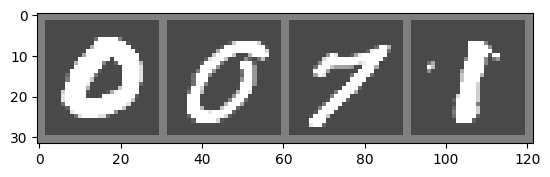

    0     0     7     1


In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join(f'{labels[j]:5}' for j in range(batch_size)))


#### Check the shape of images. 
Since we will start with Fully Connected networks, we have to convert the image into a single vector. We will do that using the `reshape` function from PyTorch. 

In [10]:
images.shape

torch.Size([4, 1, 28, 28])

In [11]:
input_dim = images.reshape(batch_size, -1).shape[1]
input_dim

784

#### Structure 
So our network will receive a single vector of 784 dimensions and return a vector of 10 dimensions. The output shall correspond to how likely the vector represents a specific class. (The higher the value, the better) 

### Task 3 (2 point)

##### Build your first Fully Connected Network
The network should have three linear layers. The last layer should have `out_features = num_classes`. Also implement the `forward()` function. All the processing happens in the forward function. Remember that you also need a non linearity (do you remember why?). You can use `F.relu()` for the non-linraity.

Replace the `None` with appropriate code block.
Use the [Linear] (https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) class from PyTorch for this task. 
* `lin1` should have out_features = input_dim/2
* `lin2` should have in_features=input_dim/2, out_features = input_dim/4
* `lin3` should have out_features = num_classes

Remember that the `in_channel` and `out_channel` should be **integers**

In [12]:
import torch.nn as nn

class FCNetwork(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super().__init__()
        self.lin1 = nn.Linear(input_dim, input_dim//2)
        self.lin2 = nn.Linear(input_dim//2, input_dim//4)
        self.lin3 = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        # Apply ReLU
        x = F.relu(x)
        x = self.lin2(x)
        # Apply ReLU
        x = F.relu(x)
        x = self.lin3(x)
        return x


In [13]:
network = FCNetwork(input_dim=input_dim, num_classes=10)

### Task 4 (1 point)
Create an optimizer and the loss function. We will use [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as the loss function and [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) as the optimizer. 

Use a learning rate of `0.001` and play around with other parameters. Put `momentum` parameter as `0.9`.


Replace the `None` with appropriate statements

In [14]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), momentum = 0.9, lr = 0.001)

In [28]:
PATH = './mnist_net.pth'


Reshape the input before sending it to the model.

Replace `None` with appropriate statement

In [31]:
min_val_loss = float("inf")
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    network.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # Reshape the inputs
        inputs = inputs.view(inputs.shape[0], -1) # NONE
        
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    network.eval()
    val_loss = 0
    with torch.no_grad():
        for i, data in enumerate(valloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # Reshape the inputs
            inputs = inputs.view(inputs.shape[0], -1) # NONE
            
            outputs = network(inputs)
            loss = criterion(outputs, labels)
            # print statistics
            val_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {val_loss / 2000:.3f}')
                val_loss = 0.0
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        print(f"The new best model is at epoch {epoch}")
        torch.save(network.state_dict(), PATH)
    print(f'Epoch: {epoch} over')
    

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x196 and 784x10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


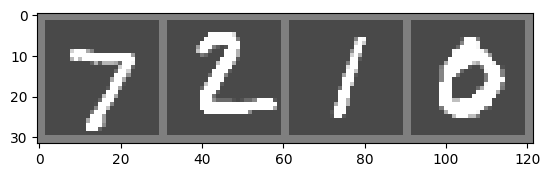

GroundTruth:      7     2     1     0


In [24]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j]:5}' for j in range(4)))

In [27]:
network = FCNetwork(input_dim=input_dim, num_classes=10)
network.load_state_dict(torch.load(PATH))

IsADirectoryError: [Errno 21] Is a directory: '/Users/merterol/uzh/Computational Science/Sem 2/ESC403/Exercise 8/data/MNIST'


Reshape the input before sending it to the model.

Replace `None` with appropriate statements.

In [ ]:
# Reshape the images variable
images_reshaped = None
outputs = network(images_reshaped)

In [32]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{predicted[j]:5}'
                              for j in range(4)))


NameError: name 'outputs' is not defined

#### Model evaluation
We have already trained our model. Next, we can evaluate its performance on the `test` set. We will use `accuracy` as the evaluation metric.


Reshape the input before sending it to the model.

Replace `None` with appropriate statements.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
network.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        # Reshape the inputs
        inputs = None
        outputs = network(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total} %')

### Bonus (1 point)
Use two different optimizers, such as SGD and Adam, for training a FCN model on MNIST dataset. Compare them by ploting their training loss and validation loss on the same plot. You just have to use a different optimizer and just re-use the training and evaluation code. 

### Task 5 (5 point)

##### Basics for Convolutional Neural Network

In the lecture, we learned that the basis of CNNs is convolutional operations. Specifically, we slide an NxM filter over the original image to obtain the result. To prepare for CNNs, we will implement convolutional operations in this exercise. First, let's recap the following slide from the lecture


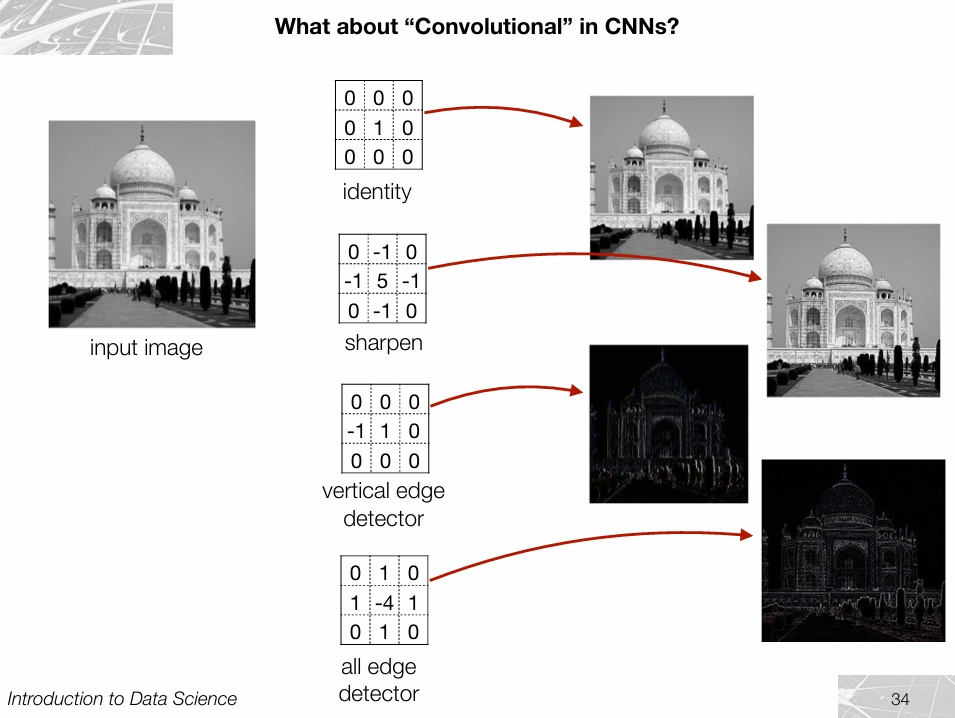

As we know, computers represent images as matrices, such as H\*W\*C, where H is the height of the image, W is the width of the image, and C is the number of channels in the image. For a grayscale image, C equals 1, and for an RGB image, C equals 3. According to the slide, we understand that applying different filters to the input image can produce various effects, such as sharpening.

#### Task 5.1 (2 points)

Implement a sharpening filter and apply it to the following `input_image`, then visualize the result. **Do not use convolutional operation functions from external libraries.** A simple method is to define the filter as a 3x3 NumPy array. Then slide the filter horizontally and vertically across the input image. For pixels outside the image boundaries, you can assume they have a value of 0. You may also choose to skip boundary pixels, meaning apply the filter only to pixels with x in [1, width-2] and y in [1, height-2].

In [35]:
#install the missing package if necessary:
#!pip install opencv-python

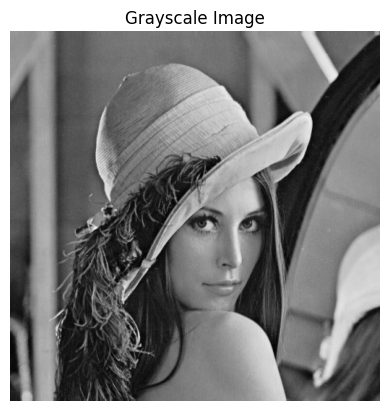

In [34]:
import cv2
from matplotlib import pyplot as plt

# Path to your BMP image
image_path = './data/sample.bmp'

# Load the image in grayscale
input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if input_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Display the grayscale image using matplotlib
    plt.imshow(input_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # Turn off the axis numbers and ticks
    plt.show()

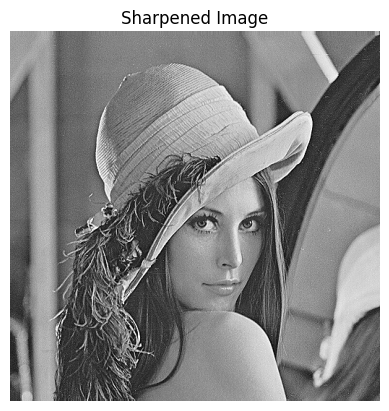

In [39]:
# Your code and result visualization here:
# TO-DO:
sharpener = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])

# Apply the sharpening filter to the input image
sharpened_image = cv2.filter2D(input_image, -1, sharpener)

if input_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Display the grayscale image using matplotlib
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')  # Turn off the axis numbers and ticks
    plt.show()

#### Task 5.2 (1 points)

As done in task 5.1, implement the vertical edge detetor and visualize the result.

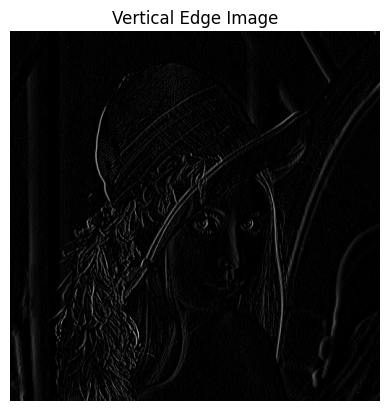

In [41]:
vertical_edge = np.array([[0, 0, 0],
                        [-1, 1, 0],
                        [0, 0, 0]])

# Apply the sharpening filter to the input image
edged_image = cv2.filter2D(input_image, -1, vertical_edge)

if edged_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Display the grayscale image using matplotlib
    plt.imshow(edged_image, cmap='gray')
    plt.title('Vertical Edge Image')
    plt.axis('off')  # Turn off the axis numbers and ticks
    plt.show()

#### Task 5.3 (1 points)

As done in task 5.1 and task 5.2, implement the all edge detetor and visualize the result.

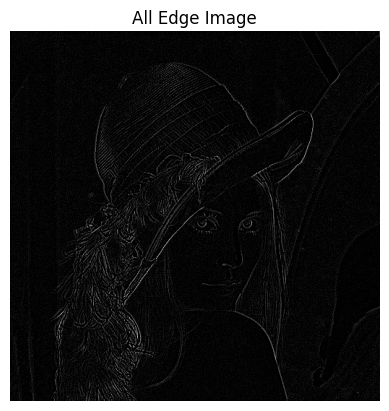

In [43]:
edge = np.array([[0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]])

# Apply the sharpening filter to the input image
all_edged_image = cv2.filter2D(input_image, -1, edge)

if all_edged_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Display the grayscale image using matplotlib
    plt.imshow(all_edged_image, cmap='gray')
    plt.title('All Edge Image')
    plt.axis('off')  # Turn off the axis numbers and ticks
    plt.show()

#### Task 5.4 (1 points)

The opposite operation of task 5.1 is blurring the input image. What's a good filter for this operation? Implement your choice and visualize the result

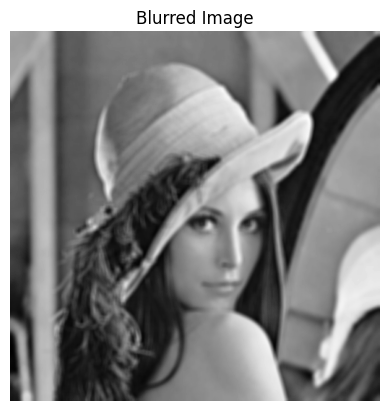

In [50]:
blur = np.full((7, 7), 1/49)

# Apply the sharpening filter to the input image
blurred_image = cv2.filter2D(input_image, -1, blur)

if blurred_image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Display the grayscale image using matplotlib
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Blurred Image')
    plt.axis('off')  # Turn off the axis numbers and ticks
    plt.show()